**DataLoader**  

In [1]:
# Test dataloader and image transformations
from dataset import create_loaders
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import torch
aia_test_data = np.load("../data/aia_test.npy", allow_pickle=True)
iris_test_data = np.load("../data/iris_test.npy", allow_pickle=True)
ind1 = 176
ind2 = 11
real_aia = torch.from_numpy(aia_test_data[ind1]).unsqueeze(0)
real_iris = torch.from_numpy(iris_test_data[ind2]).unsqueeze(0)

print(real_aia.shape)

torch.Size([1, 1, 256, 256])


In [2]:
# Load single aia iris image pair
train_loader, test_loader = create_loaders()
iris_ims, sdo_ims = next(iter(train_loader))
print(iris_ims.shape, sdo_ims.shape)

torch.Size([1, 1, 256, 256]) torch.Size([1, 1, 256, 256])


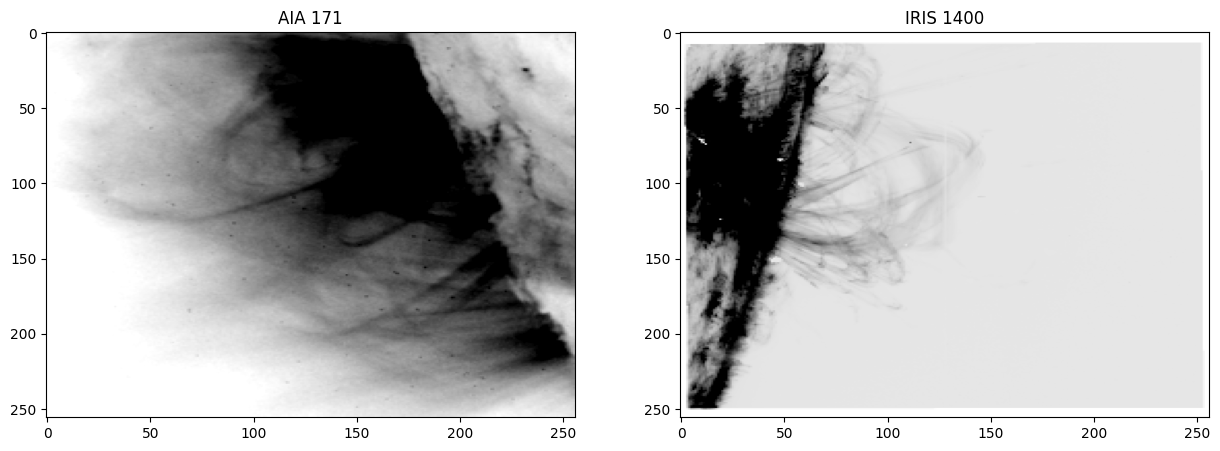

In [11]:
# plot image pair
aia_im = np.squeeze(sdo_ims[0, 0, :, :].numpy())
iris_im = np.squeeze(iris_ims[0, 0, :, :].numpy())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('AIA 171')
ax1.imshow(aia_im, aspect='auto', cmap='binary')
ax2.set_title('IRIS 1400')
ax2.imshow(iris_im, aspect='auto', cmap='binary')
plt.show()

**Generator**

In [6]:
import torch
from generator import Generator

# Create fake input
x = torch.randn(1, 1, 250, 250)
# Create generator
G = Generator(num_res_blocks=9)
# Pass fake input through generator
y = G(x)
print(y.shape)


torch.Size([1, 1, 252, 252])


**Discriminator**

In [7]:
import torch 
from discriminator import Discriminator

# Create fake input
x = torch.randn((1, 1, 250, 250))
# Create discriminator
D = Discriminator()
# Pass fake input through discriminator
y = D(x)
print(y.shape)

torch.Size([1, 1, 30, 30])


In [2]:
# # Test dataloader and image transformations
# from dataset import create_loaders
# import matplotlib.pyplot as plt
# import numpy as np

# # Randomly select 1000 training images for each dataset
# train_loader, test_loader = create_loaders(test_percent=0.3, batch_size=1000, sdo_channels=['171'], iris_channel='1400')
# # Get a batch of training data
# iris_batch, sdo_batch = next(iter(train_loader))
# print(iris_batch.shape, sdo_batch.shape)
# np.save('../sdata/iris_train.npy', iris_batch)
# np.save('../sdata/aia_train.npy', sdo_batch)
# # Get a batch of testing data
# train_loader, test_loader = create_loaders(test_percent=0.3, batch_size=200, sdo_channels=['171'], iris_channel='1400')
# iris_batch, sdo_batch = next(iter(test_loader))
# print(iris_batch.shape, sdo_batch.shape)
# np.save('../sdata/iris_test.npy', iris_batch)
# np.save('../sdata/aia_test.npy', sdo_batch)

torch.Size([1000, 1, 256, 256]) torch.Size([1000, 1, 256, 256])
torch.Size([200, 1, 256, 256]) torch.Size([200, 1, 256, 256])
